In [1]:
from sklearn.datasets import make_classification
import numpy as np

x,y=make_classification(n_samples=100,n_features=2, n_informative=1, n_redundant=0, n_classes=2,
                        n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

In [2]:
import matplotlib.pyplot as plt

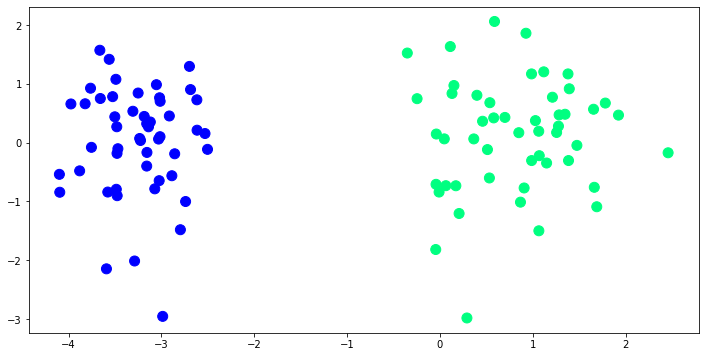

In [3]:
plt.figure(figsize=(12,6))
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)

SIGMOID FUNCTION CLASSIFICATION

In [4]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [15]:
def logistic_sigmoid(x,y):
  x=np.insert(x,0,1,axis=1) #random point initializing
  weights=np.ones(x.shape[1]) #random line initializing at the start
  lr=0.1

  for i in range(1000):
    j=np.random.randint(0,100)
    y_hat=sigmoid(np.dot(x[j],weights))
    weights=weights+lr*(y[j]-y_hat)*x[j]

  return weights[0],weights[1:]

In [16]:
intercept,coef=logistic_sigmoid(x,y)

In [17]:
print(intercept)
print(coef)

2.8467242137631388
[2.81774672 0.18080657]


In [18]:
m= -(coef[0]/coef[1])
b= -(intercept/coef[1])

In [19]:
x_input= np.linspace(-3,3,100)
y_input= m*x_input + b

(-4.0, 3.0)

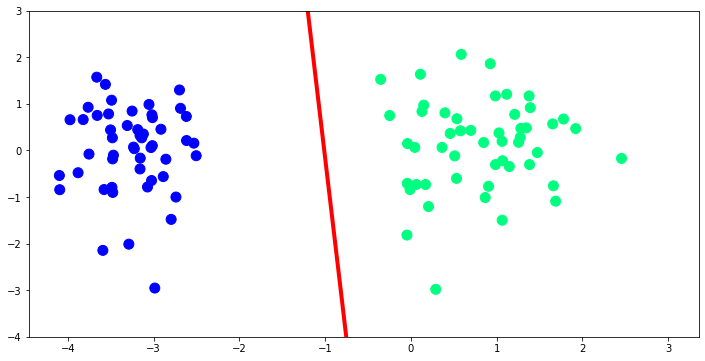

In [20]:
plt.figure(figsize=(12,6))
plt.plot(x_input,y_input,color='red',linewidth=4)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-4,3)

PERCEPTRON TRICK CLASSIFICATION

In [25]:
def step(z):
  return 1 if z>=0 else 0

In [26]:
def perceptron(x,y):
  x=np.insert(x,0,1,axis=1) #random point initializing
  weights=np.ones(x.shape[1]) #random line initializing at the start
  lr=0.1

  for i in range(1000):
    j=np.random.randint(0,100)
    y_hat=step(np.dot(x[j],weights))
    weights=weights+lr*(y[j]-y_hat)*x[j]

  return weights[0],weights[1:]

In [27]:
intercept1,coef1=perceptron(x,y)

In [28]:
m= -(coef1[0]/coef1[1])
b= -(intercept1/coef1[1])

In [29]:
x_inp= np.linspace(-3,3,100)
y_inp= m*x_inp + b

(-4.0, 3.0)

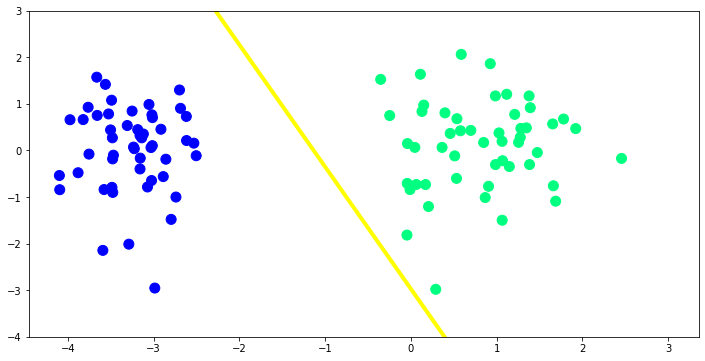

In [30]:
plt.figure(figsize=(12,6))
plt.plot(x_inp,y_inp,color='yellow',linewidth=4)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-4,3)

SCIKIT-LEARN LOGISTIC REGRESSION CLASSIFICATION

In [21]:
from sklearn.linear_model import LogisticRegression
lo=LogisticRegression()
lo.fit(x,y)

LogisticRegression()

In [22]:
m1=-(lo.coef_[0][0]/lo.coef_[0][1])
b1=-(lo.intercept_/lo.coef_[0][1])

In [23]:
x_input1= np.linspace(-3,3,100)
y_input1= m1*x_input + b1

(-4.0, 3.0)

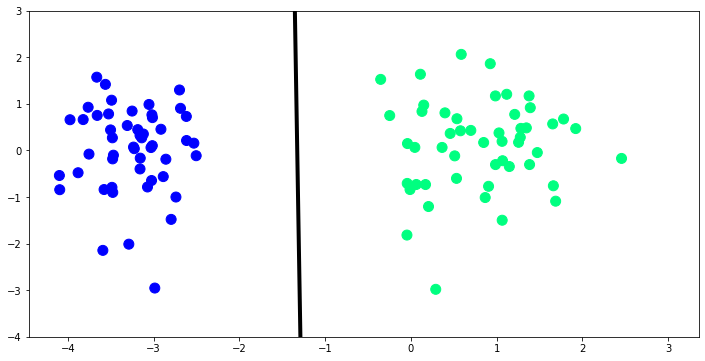

In [32]:
plt.figure(figsize=(12,6))
plt.plot(x_input1,y_input1,color='black',linewidth=4)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-4,3)

COMPARISON

(-4.0, 3.0)

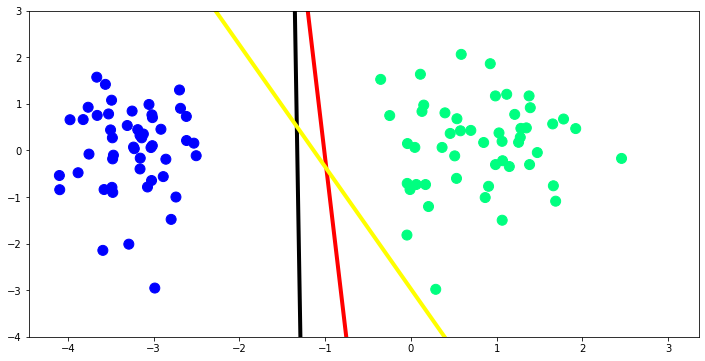

In [31]:
plt.figure(figsize=(12,6))
plt.plot(x_input,y_input,color='red',linewidth=4) #sigmoid
plt.plot(x_input1,y_input1,color='black',linewidth=4) #logitics regression
plt.plot(x_inp,y_inp,color='yellow',linewidth=4) #perceptron
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-4,3)

Better than The Perceptron Trick but still not close to perfect answer.